# Plotting the salinity distribution

In [1]:
import iris
import glob
import re
from iris.experimental.equalise_cubes import equalise_attributes

import matplotlib.pyplot as plt
import seaborn

In [2]:
%matplotlib inline

In [3]:
infiles = glob.glob("/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_*.nc")

In [4]:
print infiles

['/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_187101-188012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_193101-194012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_195101-196012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_200601-201212.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_200101-200512.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_185001-186012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_O

In [5]:
def get_time_constraint(time_list):
    """Get the time constraint used for reading an iris cube."""
    
    start_date, end_date = time_list

    date_pattern = '([0-9]{4})-([0-9]{1,2})-([0-9]{1,2})'
    assert re.search(date_pattern, start_date)
    assert re.search(date_pattern, end_date)

    if (start_date == end_date):
        year, month, day = start_date.split('-')    
        time_constraint = iris.Constraint(time=iris.time.PartialDateTime(year=int(year), month=int(month), day=int(day)))
    else:  
        start_year, start_month, start_day = start_date.split('-') 
        end_year, end_month, end_day = end_date.split('-')
        time_constraint = iris.Constraint(time=lambda t: iris.time.PartialDateTime(year=int(start_year), month=int(start_month), day=int(start_day)) <= t.point <= iris.time.PartialDateTime(year=int(end_year), month=int(end_month), day=int(end_day)))

    return time_constraint

In [6]:
time_constraint = get_time_constraint(['1986-01-01', '2005-12-31'])

In [7]:
with iris.FUTURE.context(cell_datetime_objects=True):
    cube = iris.load(infiles, 'sea_water_salinity' & time_constraint)

/g/data/r87/dbi599/miniconda2/envs/default/lib/python2.7/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [8]:
print cube

0: sea_water_salinity / (g/kg)         (time: 5; depth: 40; latitude: 192; longitude: 256)
1: sea_water_salinity / (g/kg)         (time: 5; depth: 40; latitude: 192; longitude: 256)
2: sea_water_salinity / (g/kg)         (time: 10; depth: 40; latitude: 192; longitude: 256)


In [9]:
equalise_attributes(cube)
iris.util.unify_time_units(cube)
cube = cube.concatenate_cube()

In [10]:
print cube

sea_water_salinity / (g/kg)         (time: 20; depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          time                           x          -             -               -
          depth                          -          x             -               -
          latitude                       -          -             x               -
          longitude                      -          -             -               x
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IBU
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CanESM2_historicalGHG_r0i0p0.nc...
          branch_time: 171915.0
          branch_time_YMDH: 2321:01:01:00
          cmor_version: 2.5.4
          contact: cccma_info@ec.gc.ca
          drift_removal: Masked 0 of 19660

In [11]:
mean_field = cube.collapsed('time', iris.analysis.MEAN)

In [12]:
print mean_field

sea_water_salinity / (g/kg)         (depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          depth                           x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Scalar coordinates:
          time: 1996-01-01 00:00:00, bound=(1986-01-01 00:00:00, 2006-01-01 00:00:00)
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IBU
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CanESM2_historicalGHG_r0i0p0.nc...
          branch_time: 171915.0
          branch_time_YMDH: 2321:01:01:00
          cmor_version: 2.5.4
          contact: cccma_info@ec.gc.ca
          drift_removal: Masked 0 of 1966080 points bec

In [13]:
volcello = '/g/data/ua6/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/fx/ocean/volcello/r0i0p0/volcello_fx_CanESM2_historicalGHG_r0i0p0.nc'
volume = iris.load_cube(volcello)

In [14]:
print volume

ocean_volume / (m3)                 (depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          depth                           x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IGS
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 135415.0
          branch_time_YMDH: 2221:01:01:00
          cmor_version: 2.5.4
          comment: grid-cell volume ca. 2000.
          contact: cccma_info@ec.gc.ca
          creation_date: 2011-05-04T17:19:42Z
          experiment: GHG-only
          experiment_id: historicalGHG
          forcing: GHG (GHG includes CO2,CH4,N2O,CFC

In [15]:
print mean_field.data.shape
print volume.data.shape

(40, 192, 256)
(40, 192, 256)


In [16]:
print mean_field.data.compressed().shape
print volume.data.compressed().shape

(1075296,)
(1075296,)


In [17]:
40 * 192 * 256

1966080

## Kernel density estimate

Weighted KDE calculator from [here](http://nbviewer.jupyter.org/gist/tillahoffmann/f844bce2ec264c1c8cb5)

In [18]:
import numpy as np
from scipy.spatial.distance import cdist

class gaussian_kde(object):
    """Representation of a kernel-density estimate using Gaussian kernels.

    Kernel density estimation is a way to estimate the probability density
    function (PDF) of a random variable in a non-parametric way.
    `gaussian_kde` works for both uni-variate and multi-variate data.   It
    includes automatic bandwidth determination.  The estimation works best for
    a unimodal distribution; bimodal or multi-modal distributions tend to be
    oversmoothed.

    Parameters
    ----------
    dataset : array_like
        Datapoints to estimate from. In case of univariate data this is a 1-D
        array, otherwise a 2-D array with shape (# of dims, # of data).
    bw_method : str, scalar or callable, optional
        The method used to calculate the estimator bandwidth.  This can be
        'scott', 'silverman', a scalar constant or a callable.  If a scalar,
        this will be used directly as `kde.factor`.  If a callable, it should
        take a `gaussian_kde` instance as only parameter and return a scalar.
        If None (default), 'scott' is used.  See Notes for more details.
    weights : array_like, shape (n, ), optional, default: None
        An array of weights, of the same shape as `x`.  Each value in `x`
        only contributes its associated weight towards the bin count
        (instead of 1).

    Attributes
    ----------
    dataset : ndarray
        The dataset with which `gaussian_kde` was initialized.
    d : int
        Number of dimensions.
    n : int
        Number of datapoints.
    neff : float
        Effective sample size using Kish's approximation.
    factor : float
        The bandwidth factor, obtained from `kde.covariance_factor`, with which
        the covariance matrix is multiplied.
    covariance : ndarray
        The covariance matrix of `dataset`, scaled by the calculated bandwidth
        (`kde.factor`).
    inv_cov : ndarray
        The inverse of `covariance`.

    Methods
    -------
    kde.evaluate(points) : ndarray
        Evaluate the estimated pdf on a provided set of points.
    kde(points) : ndarray
        Same as kde.evaluate(points)
    kde.pdf(points) : ndarray
        Alias for ``kde.evaluate(points)``.
    kde.set_bandwidth(bw_method='scott') : None
        Computes the bandwidth, i.e. the coefficient that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        .. versionadded:: 0.11.0
    kde.covariance_factor : float
        Computes the coefficient (`kde.factor`) that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        The default is `scotts_factor`.  A subclass can overwrite this method
        to provide a different method, or set it through a call to
        `kde.set_bandwidth`.

    Notes
    -----
    Bandwidth selection strongly influences the estimate obtained from the KDE
    (much more so than the actual shape of the kernel).  Bandwidth selection
    can be done by a "rule of thumb", by cross-validation, by "plug-in
    methods" or by other means; see [3]_, [4]_ for reviews.  `gaussian_kde`
    uses a rule of thumb, the default is Scott's Rule.

    Scott's Rule [1]_, implemented as `scotts_factor`, is::

        n**(-1./(d+4)),

    with ``n`` the number of data points and ``d`` the number of dimensions.
    Silverman's Rule [2]_, implemented as `silverman_factor`, is::

        (n * (d + 2) / 4.)**(-1. / (d + 4)).

    Good general descriptions of kernel density estimation can be found in [1]_
    and [2]_, the mathematics for this multi-dimensional implementation can be
    found in [1]_.

    References
    ----------
    .. [1] D.W. Scott, "Multivariate Density Estimation: Theory, Practice, and
           Visualization", John Wiley & Sons, New York, Chicester, 1992.
    .. [2] B.W. Silverman, "Density Estimation for Statistics and Data
           Analysis", Vol. 26, Monographs on Statistics and Applied Probability,
           Chapman and Hall, London, 1986.
    .. [3] B.A. Turlach, "Bandwidth Selection in Kernel Density Estimation: A
           Review", CORE and Institut de Statistique, Vol. 19, pp. 1-33, 1993.
    .. [4] D.M. Bashtannyk and R.J. Hyndman, "Bandwidth selection for kernel
           conditional density estimation", Computational Statistics & Data
           Analysis, Vol. 36, pp. 279-298, 2001.

    Examples
    --------
    Generate some random two-dimensional data:

    >>> from scipy import stats
    >>> def measure(n):
    >>>     "Measurement model, return two coupled measurements."
    >>>     m1 = np.random.normal(size=n)
    >>>     m2 = np.random.normal(scale=0.5, size=n)
    >>>     return m1+m2, m1-m2

    >>> m1, m2 = measure(2000)
    >>> xmin = m1.min()
    >>> xmax = m1.max()
    >>> ymin = m2.min()
    >>> ymax = m2.max()

    Perform a kernel density estimate on the data:

    >>> X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    >>> positions = np.vstack([X.ravel(), Y.ravel()])
    >>> values = np.vstack([m1, m2])
    >>> kernel = stats.gaussian_kde(values)
    >>> Z = np.reshape(kernel(positions).T, X.shape)

    Plot the results:

    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> ax = fig.add_subplot(111)
    >>> ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
    ...           extent=[xmin, xmax, ymin, ymax])
    >>> ax.plot(m1, m2, 'k.', markersize=2)
    >>> ax.set_xlim([xmin, xmax])
    >>> ax.set_ylim([ymin, ymax])
    >>> plt.show()

    """
    def __init__(self, dataset, bw_method=None, weights=None):
        self.dataset = np.atleast_2d(dataset)
        if not self.dataset.size > 1:
            raise ValueError("`dataset` input should have multiple elements.")
        self.d, self.n = self.dataset.shape
            
        if weights is not None:
            self.weights = weights / np.sum(weights)
        else:
            self.weights = np.ones(self.n) / self.n
            
        # Compute the effective sample size 
        # http://surveyanalysis.org/wiki/Design_Effects_and_Effective_Sample_Size#Kish.27s_approximate_formula_for_computing_effective_sample_size
        self.neff = 1.0 / np.sum(self.weights ** 2)

        self.set_bandwidth(bw_method=bw_method)

    def evaluate(self, points):
        """Evaluate the estimated pdf on a set of points.

        Parameters
        ----------
        points : (# of dimensions, # of points)-array
            Alternatively, a (# of dimensions,) vector can be passed in and
            treated as a single point.

        Returns
        -------
        values : (# of points,)-array
            The values at each point.

        Raises
        ------
        ValueError : if the dimensionality of the input points is different than
                     the dimensionality of the KDE.

        """
        points = np.atleast_2d(points)

        d, m = points.shape
        if d != self.d:
            if d == 1 and m == self.d:
                # points was passed in as a row vector
                points = np.reshape(points, (self.d, 1))
                m = 1
            else:
                msg = "points have dimension %s, dataset has dimension %s" % (d,
                    self.d)
                raise ValueError(msg)

        # compute the normalised residuals
        chi2 = cdist(points.T, self.dataset.T, 'mahalanobis', VI=self.inv_cov) ** 2
        # compute the pdf
        result = np.sum(np.exp(-.5 * chi2) * self.weights, axis=1) / self._norm_factor

        return result

    __call__ = evaluate

    def scotts_factor(self):
        return np.power(self.neff, -1./(self.d+4))

    def silverman_factor(self):
        return np.power(self.neff*(self.d+2.0)/4.0, -1./(self.d+4))

    #  Default method to calculate bandwidth, can be overwritten by subclass
    covariance_factor = scotts_factor

    def set_bandwidth(self, bw_method=None):
        """Compute the estimator bandwidth with given method.

        The new bandwidth calculated after a call to `set_bandwidth` is used
        for subsequent evaluations of the estimated density.

        Parameters
        ----------
        bw_method : str, scalar or callable, optional
            The method used to calculate the estimator bandwidth.  This can be
            'scott', 'silverman', a scalar constant or a callable.  If a
            scalar, this will be used directly as `kde.factor`.  If a callable,
            it should take a `gaussian_kde` instance as only parameter and
            return a scalar.  If None (default), nothing happens; the current
            `kde.covariance_factor` method is kept.

        Notes
        -----
        .. versionadded:: 0.11

        Examples
        --------
        >>> x1 = np.array([-7, -5, 1, 4, 5.])
        >>> kde = stats.gaussian_kde(x1)
        >>> xs = np.linspace(-10, 10, num=50)
        >>> y1 = kde(xs)
        >>> kde.set_bandwidth(bw_method='silverman')
        >>> y2 = kde(xs)
        >>> kde.set_bandwidth(bw_method=kde.factor / 3.)
        >>> y3 = kde(xs)

        >>> fig = plt.figure()
        >>> ax = fig.add_subplot(111)
        >>> ax.plot(x1, np.ones(x1.shape) / (4. * x1.size), 'bo',
        ...         label='Data points (rescaled)')
        >>> ax.plot(xs, y1, label='Scott (default)')
        >>> ax.plot(xs, y2, label='Silverman')
        >>> ax.plot(xs, y3, label='Const (1/3 * Silverman)')
        >>> ax.legend()
        >>> plt.show()

        """
        if bw_method is None:
            pass
        elif bw_method == 'scott':
            self.covariance_factor = self.scotts_factor
        elif bw_method == 'silverman':
            self.covariance_factor = self.silverman_factor
        elif np.isscalar(bw_method) and not isinstance(bw_method, string_types):
            self._bw_method = 'use constant'
            self.covariance_factor = lambda: bw_method
        elif callable(bw_method):
            self._bw_method = bw_method
            self.covariance_factor = lambda: self._bw_method(self)
        else:
            msg = "`bw_method` should be 'scott', 'silverman', a scalar " \
                  "or a callable."
            raise ValueError(msg)

        self._compute_covariance()

    def _compute_covariance(self):
        """Computes the covariance matrix for each Gaussian kernel using
        covariance_factor().
        """
        self.factor = self.covariance_factor()
        # Cache covariance and inverse covariance of the data
        if not hasattr(self, '_data_inv_cov'):
            # Compute the mean and residuals
            _mean = np.sum(self.weights * self.dataset, axis=1)
            _residual = (self.dataset - _mean[:, None])
            # Compute the biased covariance
            self._data_covariance = np.atleast_2d(np.dot(_residual * self.weights, _residual.T))
            # Correct for bias (http://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Weighted_sample_covariance)
            self._data_covariance /= (1 - np.sum(self.weights ** 2))
            self._data_inv_cov = np.linalg.inv(self._data_covariance)

        self.covariance = self._data_covariance * self.factor**2
        self.inv_cov = self._data_inv_cov / self.factor**2
        self._norm_factor = np.sqrt(np.linalg.det(2*np.pi*self.covariance)) #* self.n


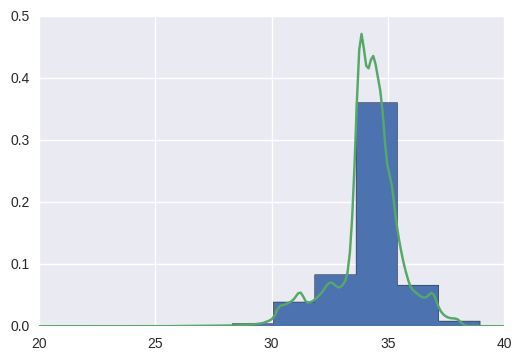

In [19]:
#matplotlib.pyplot.hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

plt.hist(mean_field.data.compressed(), weights=volume.data.compressed(), normed=True, histtype='stepfilled')

pdf = gaussian_kde(mean_field.data.compressed(), weights=volume.data.compressed())
x = np.linspace(20, 40, 200)
y = pdf(x)
plt.plot(x, y, label='weighted kde')

plt.show()

In [20]:
def broadcast_array(array, axis_index, shape):
    """Broadcast an array to a target shape.
    
    Args:
      array (numpy.ndarray): One dimensional array
      axis_index (int or tuple): Postion in the target shape that the 
        axis/axes of the array corresponds to
          e.g. if array corresponds to (lat, lon) in (time, depth lat, lon)
          then axis_index = [2, 3]
          e.g. if array corresponds to (lat) in (time, depth lat, lon)
          then axis_index = 2
      shape (tuple): shape to broadcast to
      
    For a one dimensional array, make start_axis_index = end_axis_index
    
    """

    if type(axis_index) in [float, int]:
        start_axis_index = end_axis_index = axis_index
    else:
        assert len(axis_index) == 2
        start_axis_index, end_axis_index = axis_index
    
    dim = start_axis_index - 1
    while dim >= 0:
        array = array[np.newaxis, ...]
        array = np.repeat(array, shape[dim], axis=0)
        dim = dim - 1
    
    dim = end_axis_index + 1
    while dim < len(shape):    
        array = array[..., np.newaxis]
        array = np.repeat(array, shape[dim], axis=-1)
        dim = dim + 1

    return array

In [21]:
print cube.shape

(20, 40, 192, 256)


In [22]:
print volume.data.shape 

(40, 192, 256)


In [23]:
broadcast_volume = broadcast_array(volume.data, [1, 3], cube.shape)

In [24]:
broadcast_volume.shape

(20, 40, 192, 256)

In [25]:
print broadcast_volume[0, 10, 100, 100]
print broadcast_volume[0, 10, 100, 100]

4.36563e+12
4.36563e+12


In [26]:
type(broadcast_volume)

numpy.ma.core.MaskedArray

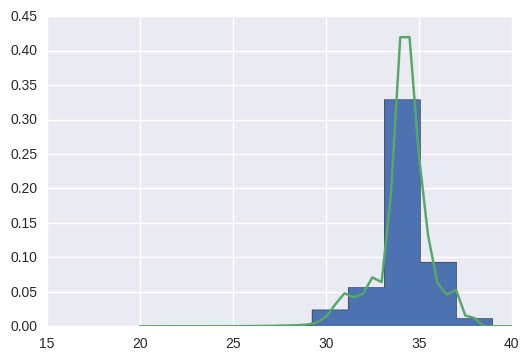

In [28]:
plt.hist(cube.data.compressed(), weights=broadcast_volume.compressed(), normed=True, histtype='stepfilled')

pdf = gaussian_kde(cube.data.compressed(), weights=broadcast_volume.compressed())
x = np.linspace(20, 40, 41)
y = pdf(x)
plt.plot(x, y, label='weighted kde')

plt.show()

The custom KDE function is fairly computationally expensive. I get memory errors if I try and increase the resolution of x too much (i.e. which would help make the curve smoother).

## Skew normal distribution

In [29]:
from scipy.optimize import curve_fit
from scipy.stats import skewnorm

In [30]:
hist, bin_edges = np.histogram(cube.data.compressed(), bins=100, normed=True, weights=broadcast_volume.compressed())
mid_points = (bin_edges[1:] + bin_edges[:-1]) / 2.

In [41]:
popt, pcov = curve_fit(skewnorm.pdf, mid_points, hist, p0=(0, 35, 1))

In [42]:
popt

array([  3.16303017,  33.48263556,   1.41485576])

With respect to the `skewnorm` functions, `a` skews the distribution, `loc` moves the mean and `scale` makes it taller ($0 < scale < 1$) or shorter ($scale > 1$).

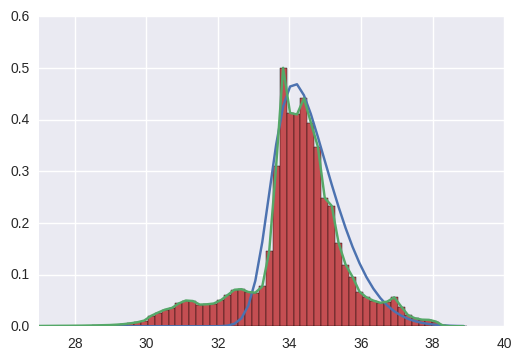

In [33]:
#a = 0
#loc = 0
#scale = 0.5
#x = np.linspace(skewnorm.ppf(0.01, a, loc=loc, scale=scale), skewnorm.ppf(0.99, a, loc=loc, scale=scale), 100)

a, loc, scale = popt

plt.plot(mid_points, skewnorm.pdf(mid_points, a, loc=loc, scale=scale))

plt.plot(mid_points, hist)
plt.hist(cube.data.compressed(), weights=broadcast_volume.compressed(), bins=100, normed=True)

plt.xlim(27, 40)

plt.show()

It appears the skewed normal probability distribution doesn't fit the salinity data that well. Changing the kurtosis also probably wouldn't help that much because you have to have tell and skinny (leptokurtic) or short and fat - this has both.

## Hyperbolic secant distribution

In [35]:
from scipy.stats import hypsecant

In [43]:
popt, pcov = curve_fit(hypsecant.pdf, mid_points, hist, p0=(35, 1))

In [44]:
popt

array([ 34.29521403,   0.69374026])

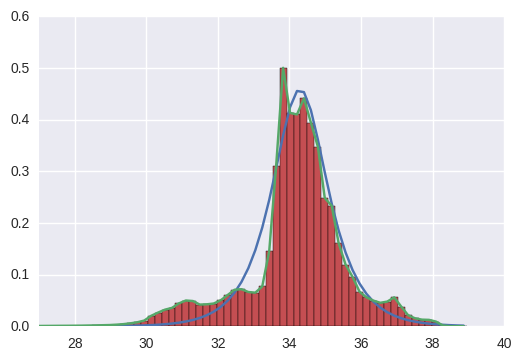

In [45]:
loc, scale = popt

plt.plot(mid_points, hypsecant.pdf(mid_points, loc=loc, scale=scale))

plt.plot(mid_points, hist)
plt.hist(cube.data.compressed(), weights=broadcast_volume.compressed(), bins=100, normed=True)

plt.xlim(27, 40)

plt.show()

The hyperbolic secant distribution fits better but the python implementation doesn't allow for skewness (you can google papers on the topic). Masking the marginal seas might also help the situation (or just looking in the non-polar areas).